In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from GraphLaplacian.binary import GraphLaplacian, MBOBinary
from GraphLaplacian.multilabel import GLMultiClass, MBOMultiClass
from GraphLaplacian.helper import plot
import pdb
from IPython.display import clear_output
from sklearn.datasets import make_moons, make_circles, make_classification
import scipy
import pdb

sns.set()

In [2]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def create_score_sheet(method, y_true, y_pred):
    return {"Method":method, 
            "accuracy":accuracy_score(y_true, y_pred), 
            "f1_score": f1_score(y_true, y_pred), 
            "presicion": precision_score(y_true, y_pred), 
            "recall": recall_score(y_true, y_pred)}

## Data 1

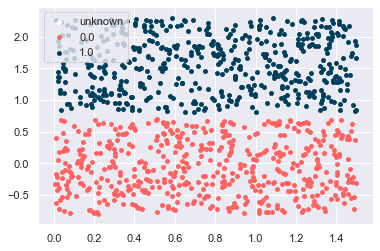

In [3]:
blue = list(zip(np.random.random(500)*1.5, np.random.random(500)*1.5 + 0.8))
red = list(zip(np.random.random(500)*1.5, np.random.random(500)*1.5 - 0.8))
Y = list(np.ones(len(blue))) + list(np.ones(len(red))*0)
X = list(blue) + list(red)

plot(X, Y, [])

## Balanced Class

In [ ]:
X0 = list(blue[:30]) + list(red[:30])
Y0 = list(np.ones(len(blue)))[:30] + list(np.ones(len(red))*0)[:30]
X1 = list(blue[30:]) + list(red[30:])

plot(X0, Y0, X1)

In [ ]:
GL = GraphLaplacian(X0, Y0, X1, cov=0.5)
GL.solve()
plot(X0 + X1, GL.Y, [])

In [ ]:
MBO = MBOBinary(X0, Y0, X1, cov=0.5, dT=0.001, Nd=3)
MBO.solve()
plot(X0 + X1, MBO.Y, [])

## Unbalanced Class

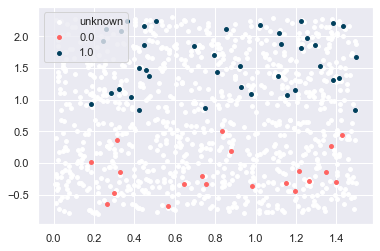

In [4]:
N = 20
X0 = list(blue[:2*N]) + list(red[:N])
Y0 = list(np.ones(len(blue)))[:2*N] + list(np.ones(len(red))*0)[:N]
X1 = list(blue[2*N:]) + list(red[N:])
Y1 = list(np.ones(len(blue)))[2*N:] + list(np.ones(len(red))*0)[N:]

plot(X0, Y0, X1)

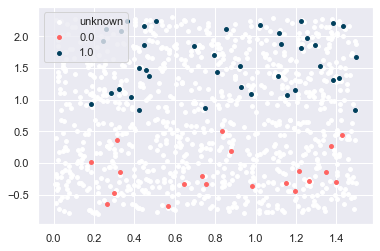

In [5]:
ax = plot(X0, Y0, X1, return_ax=True)

In [6]:
ax.figure.savefig("output/test.png")

In [7]:
GL = GraphLaplacian(X0, Y0, X1, cov=0.5)
GL.solve()
plot(X0 + X1, GL.Y, [])

KeyboardInterrupt: 

In [ ]:
MBO = MBOBinary(X0, Y0, X1, cov=0.5, dT=0.001, Nd=3)
MBO.solve()
plot(X0 + X1, MBO.Y, [])

In [ ]:
print(accuracy_score(Y1, GL.Y[len(X0):]), f1_score(Y1, GL.Y[len(X0):]))
print(accuracy_score(Y1, MBO.Y[len(X0):]), f1_score(Y1, MBO.Y[len(X0):]))

In [ ]:
result = list()
for N in [5, 10, 20, 40, 80, 160]:
    X0 = list(blue[:2*N]) + list(red[:N])
    Y0 = list(np.ones(len(blue)))[:2*N] + list(np.ones(len(red))*0)[:N]
    X1 = list(blue[2*N:]) + list(red[N:])
    Y1 = list(np.ones(len(blue)))[2*N:] + list(np.ones(len(red))*0)[N:]
    
    print("N Blue :", 2*N, "N Red :", N)
    print("Graph Laplacian")
    GL = GraphLaplacian(X0, Y0, X1, cov=0.5)
    GL.solve()
    display(plot(X0 + X1, GL.Y, []))
    
    print("MBO")
    MBO = MBOBinary(X0, Y0, X1, cov=0.5, dT=0.001, Nd=3)
    MBO.solve()
    display(plot(X0 + X1, MBO.Y, []))
    print("=================================")
    score_gl = create_score_sheet("Graph Laplacian", Y1, GL.Y[len(X0):])
    score_gl["N"] = N
    score_mbo = create_score_sheet("MBO", Y1, MBO.Y[len(X0):])
    score_mbo["N"] = N
    result += [
        score_gl,
        score_mbo
    ]

In [ ]:
df = pd.DataFrame(result)
df.to_csv("output/Imbalanced N 1000.csv", encoding="utf-8", index=False)

In [19]:
df

,Method,accuracy,f1_score,presicion,recall,N
0,Graph Laplacian,0.497462,0.664407,0.497462,1.0,5
1,MBO,0.987817,0.987903,0.976096,1.0,5
2,Graph Laplacian,0.494845,0.662069,0.494845,1.0,10
3,MBO,0.953608,0.955224,0.914286,1.0,10
4,Graph Laplacian,0.782979,0.818505,0.692771,1.0,20
5,MBO,0.960638,0.961338,0.925553,1.0,20
6,Graph Laplacian,0.935227,0.936455,0.880503,1.0,40
7,MBO,0.971591,0.971098,0.943820,1.0,40
8,Graph Laplacian,0.968421,0.965909,0.934066,1.0,80
9,MBO,0.956579,0.953717,0.911528,1.0,80


In [23]:
df = pd.read_csv("output/Imbalanced N 1000.csv")
for c in df.iloc[:, 1:5].columns:
    df.loc[:, c] = df[c].apply(lambda x: "{}%".format(round(x*100, 2)))
df.rename(columns={"N":"N0"}, inplace=True)
pd.pivot_table(df, values=["accuracy", "f1_score", "presicion", "recall"], index=["N0"],
                    columns=['Method'], aggfunc=np.sum)

accuracy                f1_score               presicion  \
Method Graph Laplacian     MBO Graph Laplacian     MBO Graph Laplacian   
N0                                                                       
5               49.75%  98.78%          66.44%  98.79%          49.75%   
10              49.48%  95.36%          66.21%  95.52%          49.48%   
20               78.3%  96.06%          81.85%  96.13%          69.28%   
40              93.52%  97.16%          93.65%  97.11%          88.05%   
80              96.84%  95.66%          96.59%  95.37%          93.41%   
160             98.08%   95.0%           97.3%  93.26%          94.74%   

                        recall          
Method     MBO Graph Laplacian     MBO  
N0                                      
5       97.61%          100.0%  100.0%  
10      91.43%          100.0%  100.0%  
20      92.56%          100.0%  100.0%  
40      94.38%          100.0%  100.0%  
80      91.15%          100.0%  100.0%  
160     87.38%          100.0%  100.0%

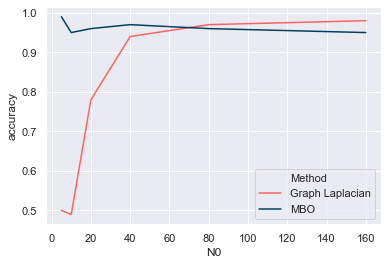

In [29]:
colors = ["#ff6361", "#003f5c", "#63005c", "#006355", "#5c3f00"]
sns.set_palette(sns.color_palette(colors))
df = pd.read_csv("output/Imbalanced N 1000.csv")
for c in df.iloc[:, 1:5].columns:
    df.loc[:, c] = df[c].apply(lambda x: round(x,2))
df.rename(columns={"N":"N0"}, inplace=True)
sns.lineplot(data=df, x="N0", y="accuracy", hue="Method")

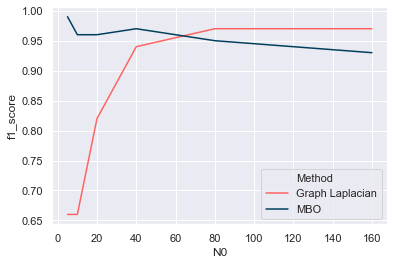

In [30]:
colors = ["#ff6361", "#003f5c", "#63005c", "#006355", "#5c3f00"]
sns.set_palette(sns.color_palette(colors))
df = pd.read_csv("output/Imbalanced N 1000.csv")
for c in df.iloc[:, 1:5].columns:
    df.loc[:, c] = df[c].apply(lambda x: round(x,2))
df.rename(columns={"N":"N0"}, inplace=True)
sns.lineplot(data=df, x="N0", y="f1_score", hue="Method")

## Different Density

### 3:7

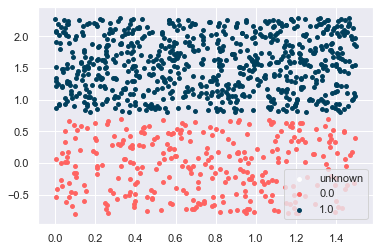

In [9]:
blue = list(zip(np.random.random(700)*1.5, np.random.random(700)*1.5 + 0.8))
red = list(zip(np.random.random(300)*1.5, np.random.random(300)*1.5 - 0.8))
Y = list(np.ones(len(blue))) + list(np.ones(len(red))*0)
X = list(blue) + list(red)

plot(X, Y, [])

In [14]:
result = list()
for N in [5, 10, 20, 40, 80, 160]:
    X0 = list(blue[:N]) + list(red[:N])
    Y0 = list(np.ones(len(blue)))[:N] + list(np.ones(len(red))*0)[:N]
    X1 = list(blue[N:]) + list(red[N:])
    Y1 = list(np.ones(len(blue)))[N:] + list(np.ones(len(red))*0)[N:]
    
    print("N Blue :", N, "N Red :", N)
    print("Graph Laplacian")
    GL = GraphLaplacian(X0, Y0, X1, cov=0.5)
    GL.solve()
    display(plot(X0 + X1, GL.Y, []))
    
    print("MBO")
    MBO = MBOBinary(X0, Y0, X1, cov=0.5, dT=0.001, Nd=3)
    MBO.solve()
    display(plot(X0 + X1, MBO.Y, []))
    print("=================================")
    score_gl = create_score_sheet("Graph Laplacian", Y1, GL.Y[len(X0):])
    score_gl["N"] = N
    score_mbo = create_score_sheet("MBO", Y1, MBO.Y[len(X0):])
    score_mbo["N"] = N
    result += [
        score_gl,
        score_mbo
    ]

N Blue : 5 N Red : 5
Graph Laplacian


KeyboardInterrupt: 

In [11]:
df = pd.DataFrame(result)
df.to_csv("output/Balanced initial_imbalance result 7_3.csv", encoding="utf-8", index=False)
df

,Method,accuracy,f1_score,presicion,recall,N
0,Graph Laplacian,0.702020,0.824926,0.702020,1.000000,5
1,MBO,0.997980,0.998561,0.998561,0.998561,5
2,Graph Laplacian,0.704082,0.826347,0.704082,1.000000,10
3,MBO,0.983673,0.988539,0.977337,1.000000,10
4,Graph Laplacian,0.823958,0.889470,0.800942,1.000000,20
5,MBO,0.996875,0.997799,0.995608,1.000000,20
6,Graph Laplacian,0.897826,0.933522,0.875332,1.000000,40
7,MBO,0.994565,0.996226,0.992481,1.000000,40
8,Graph Laplacian,0.935714,0.958269,0.919881,1.000000,80
9,MBO,0.998810,0.999194,0.998390,1.000000,80


In [ ]:
df = pd.read_csv("output/Balanced initial_imbalance result 7_3.csv")
for c in df.iloc[:, 1:5].columns:
    df.loc[:, c] = df[c].apply(lambda x: "{}%".format(round(x*100, 2)))
df.rename(columns={"N":"N0"}, inplace=True)
pd.pivot_table(df, values=["accuracy", "f1_score", "presicion", "recall"], index=["N0"],
                    columns=['Method'], aggfunc=np.sum)

colors = ["#ff6361", "#003f5c", "#63005c", "#006355", "#5c3f00"]
sns.set_palette(sns.color_palette(colors))
df = pd.read_csv("output/Balanced initial_imbalance result 7_3.csv")
for c in df.iloc[:, 1:5].columns:
    df.loc[:, c] = df[c].apply(lambda x: round(x,2))
df.rename(columns={"N":"N0"}, inplace=True)
sns.lineplot(data=df, x="N0", y="accuracy", hue="Method")

colors = ["#ff6361", "#003f5c", "#63005c", "#006355", "#5c3f00"]
sns.set_palette(sns.color_palette(colors))
df = pd.read_csv("output/Balanced initial_imbalance result 7_3.csv")
for c in df.iloc[:, 1:5].columns:
    df.loc[:, c] = df[c].apply(lambda x: round(x,2))
df.rename(columns={"N":"N0"}, inplace=True)
sns.lineplot(data=df, x="N0", y="f1_score", hue="Method")

N Blue : 5 N Red : 10
Graph Laplacian


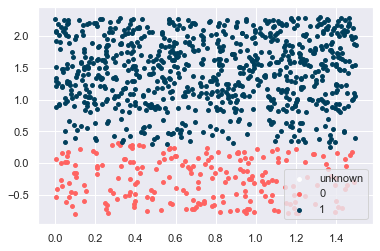

None

MBO
Interation 0 error 0.38297045101088645
Interation 1 error 0.0


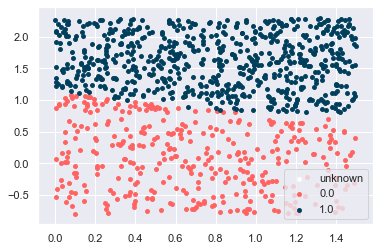

None

N Blue : 10 N Red : 20
Graph Laplacian


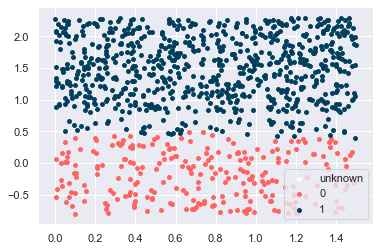

None

MBO
Interation 0 error 0.35661764705882354
Interation 1 error 0.0


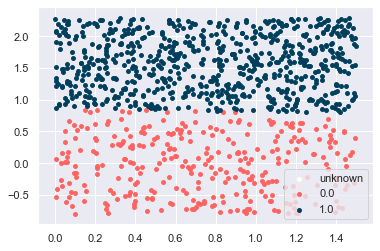

None

N Blue : 20 N Red : 40
Graph Laplacian


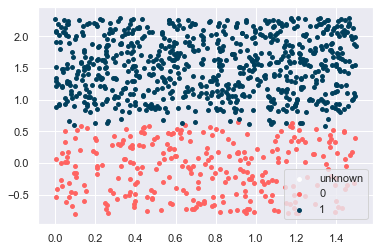

None

MBO
Interation 0 error 0.38087520259319285
Interation 1 error 0.0


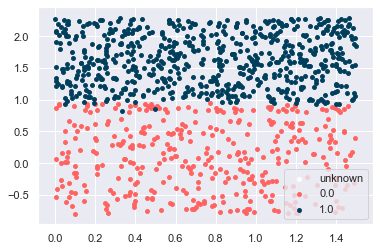

None

N Blue : 40 N Red : 80
Graph Laplacian


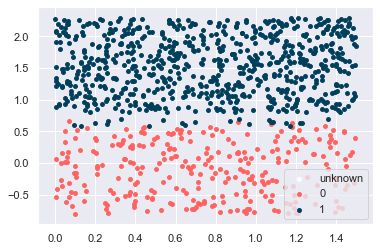

None

MBO
Interation 0 error 0.3514376996805112
Interation 1 error 0.0


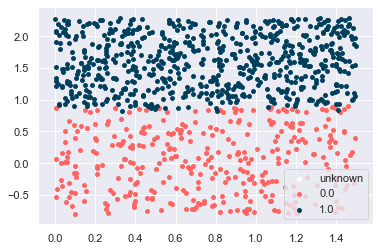

None

N Blue : 80 N Red : 160
Graph Laplacian


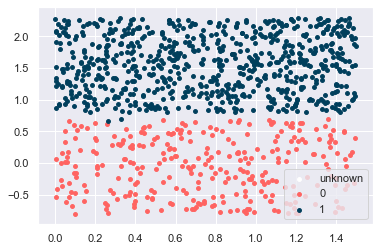

None

MBO
Interation 0 error 0.3448275862068966
Interation 1 error 0.0


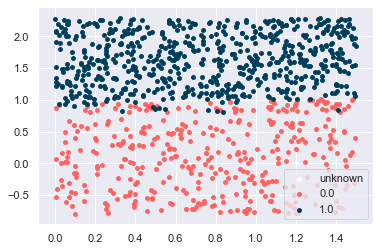

None

N Blue : 160 N Red : 320
Graph Laplacian


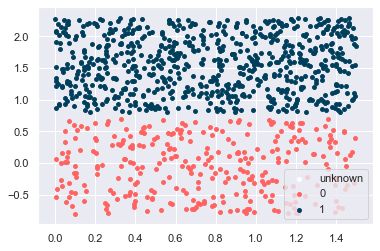

None

MBO
Interation 0 error 0.27
Interation 1 error 0.0


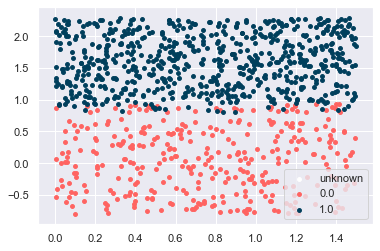

None

In [15]:
result = list()
for N in [5, 10, 20, 40, 80, 160]:
    X0 = list(blue[:N]) + list(red[:2*N])
    Y0 = list(np.ones(len(blue)))[:N] + list(np.ones(len(red))*0)[:2*N]
    X1 = list(blue[N:]) + list(red[2*N:])
    Y1 = list(np.ones(len(blue)))[N:] + list(np.ones(len(red))*0)[2*N:]
    
    print("N Blue :", N, "N Red :", 2*N)
    print("Graph Laplacian")
    GL = GraphLaplacian(X0, Y0, X1, cov=0.5)
    GL.solve()
    display(plot(X0 + X1, GL.Y, []))
    
    print("MBO")
    MBO = MBOBinary(X0, Y0, X1, cov=0.5, dT=0.001, Nd=3)
    MBO.solve()
    display(plot(X0 + X1, MBO.Y, []))
    print("=================================")
    score_gl = create_score_sheet("Graph Laplacian", Y1, GL.Y[len(X0):])
    score_gl["N"] = N
    score_mbo = create_score_sheet("MBO", Y1, MBO.Y[len(X0):])
    score_mbo["N"] = N
    result += [
        score_gl,
        score_mbo
    ]

In [16]:
df = pd.DataFrame(result)
df.to_csv("output/imbalanced initial_imbalance result 7_3.csv", encoding="utf-8", index=False)
df

,Method,accuracy,f1_score,presicion,recall,N
0,Graph Laplacian,0.913706,0.942373,0.891026,1.000000,5
1,MBO,0.947208,0.961136,1.000000,0.925180,5
2,Graph Laplacian,0.942268,0.961003,0.924933,1.000000,10
3,MBO,0.989691,0.992701,1.000000,0.985507,10
4,Graph Laplacian,0.977660,0.984794,0.970043,1.000000,20
5,MBO,0.932979,0.951426,1.000000,0.907353,20
6,Graph Laplacian,0.975000,0.983607,0.967742,1.000000,40
7,MBO,0.961364,0.973561,1.000000,0.948485,40
8,Graph Laplacian,0.997368,0.998390,0.996785,1.000000,80
9,MBO,0.909211,0.941076,1.000000,0.888710,80


In [35]:
df = pd.read_csv("output/imbalanced initial_imbalance result 7_3.csv")
for c in df.iloc[:, 1:5].columns:
    df.loc[:, c] = df[c].apply(lambda x: "{}%".format(round(x*100, 2)))
df.rename(columns={"N":"N0"}, inplace=True)
pd.pivot_table(df, values=["accuracy", "f1_score", "presicion", "recall"], index=["N0"],
                    columns=['Method'], aggfunc=np.sum)

accuracy                f1_score               presicion  \
Method Graph Laplacian     MBO Graph Laplacian     MBO Graph Laplacian   
N0                                                                       
5               91.37%  94.72%          94.24%  96.11%           89.1%   
10              94.23%  98.97%           96.1%  99.27%          92.49%   
20              97.77%   93.3%          98.48%  95.14%           97.0%   
40               97.5%  96.14%          98.36%  97.36%          96.77%   
80              99.74%  90.92%          99.84%  94.11%          99.68%   
160             100.0%  92.59%          100.0%  96.15%          100.0%   

                        recall          
Method     MBO Graph Laplacian     MBO  
N0                                      
5       100.0%          100.0%  92.52%  
10      100.0%          100.0%  98.55%  
20      100.0%          100.0%  90.74%  
40      100.0%          100.0%  94.85%  
80      100.0%          100.0%  88.87%  
160     100.0%          100.0%  92.59%

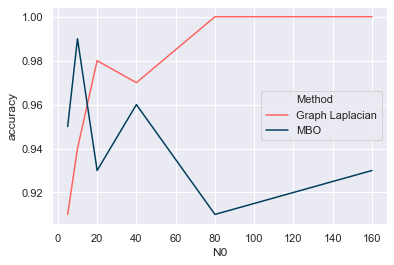

In [36]:
colors = ["#ff6361", "#003f5c", "#63005c", "#006355", "#5c3f00"]
sns.set_palette(sns.color_palette(colors))
df = pd.read_csv("output/imbalanced initial_imbalance result 7_3.csv")
for c in df.iloc[:, 1:5].columns:
    df.loc[:, c] = df[c].apply(lambda x: round(x,2))
df.rename(columns={"N":"N0"}, inplace=True)
sns.lineplot(data=df, x="N0", y="accuracy", hue="Method")

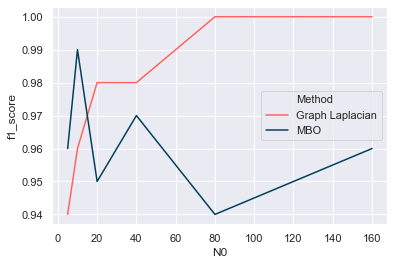

In [37]:
colors = ["#ff6361", "#003f5c", "#63005c", "#006355", "#5c3f00"]
sns.set_palette(sns.color_palette(colors))
df = pd.read_csv("output/imbalanced initial_imbalance result 7_3.csv")
for c in df.iloc[:, 1:5].columns:
    df.loc[:, c] = df[c].apply(lambda x: round(x,2))
df.rename(columns={"N":"N0"}, inplace=True)
sns.lineplot(data=df, x="N0", y="f1_score", hue="Method")

In [ ]:
X0 = list(blue[:30]) + list(red[:30])
Y0 = list(np.ones(len(blue)))[:30] + list(np.ones(len(red))*0)[:30]
X1 = list(blue[30:]) + list(red[30:])

plot(X0, Y0, X1)

In [ ]:
GL = GraphLaplacian(X0, Y0, X1, cov=0.5)
GL.solve()
plot(X0 + X1, GL.Y, [])

In [ ]:
MBO = MBOBinary(X0, Y0, X1, cov=0.5, dT=0.001, Nd=3)
MBO.solve()
plot(X0 + X1, MBO.Y, [])

### 4.5:5.5

In [ ]:
blue = list(zip(np.random.random(450)*1.5, np.random.random(450)*1.5 + 0.8))
red = list(zip(np.random.random(550)*1.5, np.random.random(550)*1.5 - 0.8))
Y = list(np.ones(len(blue))) + list(np.ones(len(red))*0)
X = list(blue) + list(red)

plot(X, Y, [])

In [ ]:
X0 = list(blue[:30]) + list(red[:30])
Y0 = list(np.ones(len(blue)))[:30] + list(np.ones(len(red))*0)[:30]
X1 = list(blue[30:]) + list(red[30:])

plot(X0, Y0, X1)

In [ ]:
GL = GraphLaplacian(X0, Y0, X1, cov=0.5)
GL.solve()
plot(X0 + X1, GL.Y, [])

In [ ]:
MBO = MBOBinary(X0, Y0, X1, cov=0.5, dT=0.001, Nd=3)
MBO.solve()
plot(X0 + X1, MBO.Y, [])